7. Functions of Several Variables (Integration)
===

[13.11 Double Integrals](#Double-Integrals)<br>
[13.12 Triple Integrals](#Triple-Integrals)<br>
[13.13 Line Integral](#Line-Integral)<br>
[13.14 Surface Integral](#Surface-Integral)<br>

In [1]:
%matplotlib inline

#rcParams['figure.figsize'] = (10,3) #wide graphs by default
import scipy
import numpy as np
import time
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output,display
import matplotlib.pylab as plt

In [2]:
from mpld3 import enable_notebook
#enable_notebook()

In [3]:
from sympy import symbols,pprint,integrate,pi,sqrt,sin,cos,diff
x,y=symbols("x y")
def doubleInt(f,X,xr,yr):
    Iy=integrate(f,[X[1],yr[0],yr[1]])
    I=integrate(Iy,[X[0],xr[0],xr[1]])
    print("the double integral of %s over [%s<%s<%s,%s<%s<%s] is %s" %(f,xr[0],X[0],xr[1],yr[0],X[1],yr[1],I))
    return I

In [4]:
W  = '\033[0m'  # white (normal)
K  = '\033[30m' # black
R  = '\033[31m' # red
G  = '\033[32m' # green
O  = '\033[1;33m' # orange
B  = '\033[34m' # blue
P  = '\033[35m' # purple
T =  '\033[1;33;47m' #Title


In [5]:
def doubleInt3(f,X,xr,yr):
    Iy=integrate(f,[X[1],yr[0],yr[1]])
    I=integrate(Iy,[X[0],xr[0],xr[1]])
    #print("  %s \t  %s" %(xr[1],yr[1]))
    yrs=str(yr[1])
    xrs=' '+str(xr[1])
    print(xrs.ljust(9,' ')+yrs)
    print("ʃ   d",R+'{}'.format(X[0]),K+"ʃ ",B+"{}".format(f),K+" d",R+"{}".format(X[1]),K+" = ","{}".format(I)) 
    
    yrs0=str(yr[0])
    xrs0=str(xr[0])
    print(xrs0.ljust(8,' ')+yrs0)
    return I

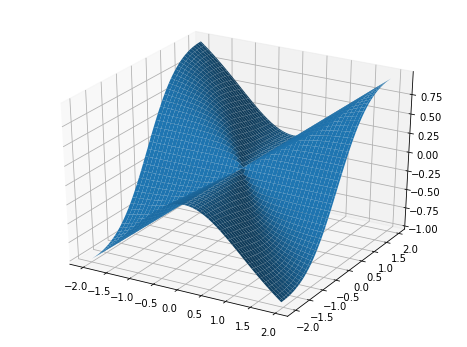

In [144]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
X = np.arange(-2, 2, 0.04)
Y = np.arange(-2, 2, 0.04)
X, Y = np.meshgrid(X, Y)
f= X*X*Y/(X*X+Y*Y)
ax.plot_surface(X, Y, f)

There are plenty of visualization packages in Python, MayaVi is one of them which provides advanced handy utilies, animation, interaction etc. Here, after struggle installztion of VTK library, MayaVi with its plugin works on notebook environment:  

In [ ]:
import numpy as np
import mayavi.mlab as mlab
#import  moviepy.editor as mpy

In [10]:
mlab.init_notebook(backend='x3d', local=True) 

Notebook initialized with x3d backend.


In [11]:
duration = 2 # duration of the animation in seconds (it will loop)

# MAKE A FIGURE WITH MAYAVI

fig = mlab.figure(size=(200, 200), bgcolor=(1,1,1))

#u = np.linspace(0,2*np.pi,100)
X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(X, Y)
f= X*X*Y/(X*X+Y*Y)
#xx,yy,zz = np.cos(u), np.sin(3*u), np.sin(u) # Points
#l = mlab.plot3d(xx,yy,zz, representation="wireframe", tube_sides=5,
mlab.surf(f, warp_scale='auto')
#mlab.plot3d(xx,yy,f, representation="wireframe",tube_sides=5,line_width=.5, tube_radius=0.2, figure=fig)

In [35]:
def plot3d(x,y,z,contour=False):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.jet,alpha=0.6)
    if contour==True:
       ax.contour(x, y, z,  lw=3, cmap="autumn_r", linestyles="solid", zdir='z',offset=-2)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_zlim(-2, 1)

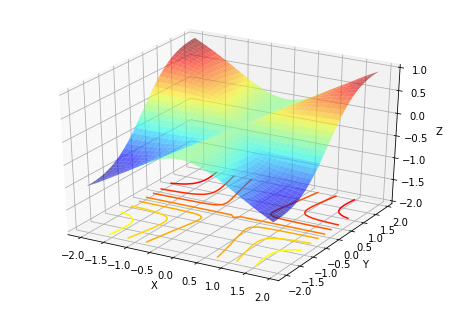

In [5]:
x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
x,y=np.meshgrid(x,y)
f= x**2*y/(x**2+y**2)
plot3d(x,y,f)

Double Integrals
---

If $z = f (x, y)$ is continuous and $f (x, y)$ is nonnegative for all $(x, y)$
in a region $D$ on $X$-$Y$ plane, then the volume of solid under the graph of
$f (x, y)$ and above $X - Y$ plane by the region
$D$ is
$$ V = \iint\limits_D f (x, y) d A $$
where $d A = d x d y$ is the element of area and $V$ is called the double
integral of $f (x, y)$ over $D$.

<img src="imgs/8/cal7-30.png" width=60% /> 

Theorem (Fubini's Theorem)
---
If $f (x, y)$ is continuous over $D$,<br>
**1.** and $D$=$\{ (x, y) | a \leqslant x \leqslant b, g_1 (x) \leqslant y
    \leqslant g_2 (x) \},$
    
$$ \mathbf{\iint\limits_D f (x, y) d A = \int_a^b d x
       \int_{g_1 (x)}^{g_{_2 (x)}} f (x, y) d y }$$
**2.** and $D$=$\{ (x, y) | c \leqslant y \leqslant d, h_1 (y) \leqslant x
    \leqslant h_2 (y) \},$

$$\mathbf{ \iint\limits_Df (x, y) d A = \int_c^d d y
       \int_{h_1 (y)}^{h_{_2 (y)}} f (x, y) d x }$$

<img src="imgs/8/cal7-31.png" width=60% /> 

Example
---
$$\underset{\{1\le y\le2,0\le x\le1\}}{\iint} 3x^2y d A$$

In [21]:
I=doubleInt3(3*x*x*y,[y,x],[1,2],[0,1])

 2       1
ʃ   d y ʃ  3*x**2*y  d x  =  3/2
1       0


Example
---
$$\underset{\{0\le x\le2,-1\le y\le1\}}{\iint} (1-2xy^2) d A$$

In [23]:
I=doubleInt3(1-2*x*y*y,[x,y],[0,2],[-1,1])

 2       1
ʃ   d x ʃ  -2*x*y**2 + 1  d y  =  4/3
0       -1


Properties of Double Integrals
---
Suppose that both $\underset{D}{\iint} f(x, y) d A$ and $\underset{D}{\iint} g(x, y) d A$ exist and $c\in\mathbb{R}$. Then
1. $\underset{D}{\iint} cf(x, y) d A=c\underset{D}{\iint} f(x, y) d A$,
-  $\underset{D}{\iint} [f(x, y)\pm g(x,y)] d A= \underset{D}{\iint} f(x, y) d A\pm \underset{D}{\iint} g(x, y) d A$,
- If $f(x,y)\ge0$, then $\underset{D}{\iint} f(x, y) d A\ge0$,
- If $f(x,y)\ge g(x,y)$, then $\underset{D}{\iint} f(x, y) d A\ge\underset{D}{\iint} f(x, y) d A$.
- $\underset{D=D_1\cup D_2}{\iint} f(x, y) d A= \underset{D_1}{\iint} f(x, y) d A+\underset{D_2}{\iint} f(x, y) d A$
  where $D_1\cap D_2=\emptyset$.

Exercise, p.1155
---

**14.**<br>
$\underset{0\le x\le2,0\le y\le1}{\iint} 2x d A$ is the solid under surface $f(x,y)=2x$ and above the rectangle,
$\{0\le x\le2,0\le y\le1\}$.

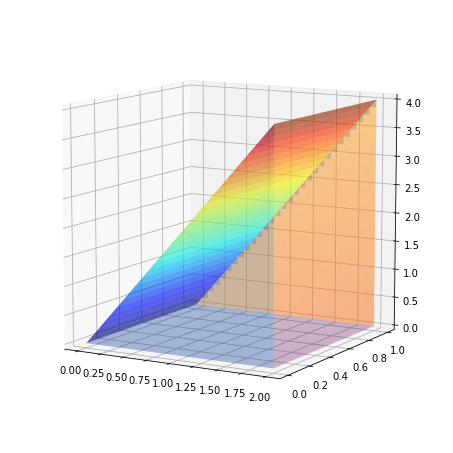

In [16]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

X = np.linspace(0, 2, 30)
X1 = np.linspace(0, 2, 30)
Y = np.linspace(0, 1, 30)
Zs =  2*X1
X,Y=np.meshgrid(X,Y)
func= 2*X
base=0*X

Xs,Zs=np.meshgrid(X1,Zs)

for i in range(len(Xs)):
    Xs[i][:i]=0
    Zs[i][:i]=0
ax.plot_surface(Xs,0*Xs,Zs, rstride=1, cstride=1,alpha=0.2)
ax.plot_surface(Xs,0*Xs+1,Zs, rstride=1, cstride=1, alpha=0.4)

ax.plot_surface(X,Y, func, rstride=1, cstride=1, cmap=cm.jet,alpha=0.6)
ax.plot_surface(X,Y, base, rstride=1, cstride=1, cmap=cm.jet,alpha=0.2)
ax.plot_surface(0*X+2,Y, func, rstride=1, cstride=1, cmap=cm.autumn,alpha=0.1);
ax.view_init(elev=10, azim=-60)

**14.**<br>
$\underset{0\le x,y,\ x^2+y^2\le9}{\iint} \sqrt{9-x^2-y^2} d A$ is half upper sphere centred at $(0,0,0)$ with radius 3.

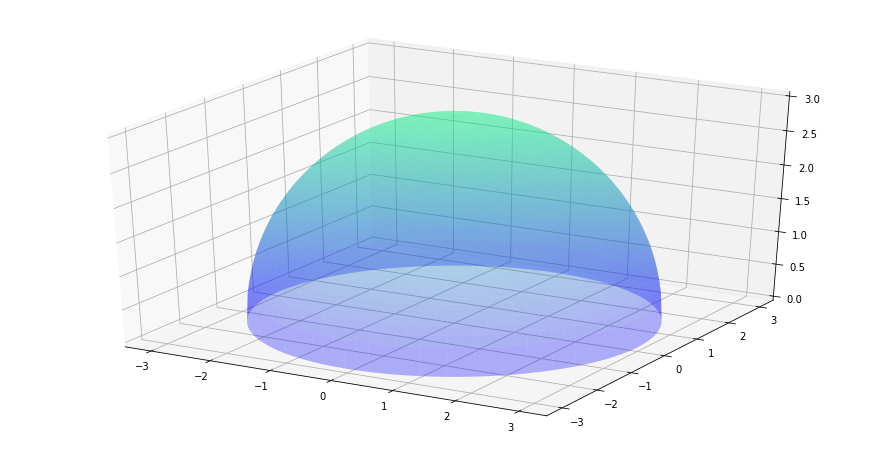

In [24]:
fig = plt.figure(figsize=(12,6))
ax = Axes3D(fig)
r = np.linspace(0, 3, 100)
t = np.linspace(0, 2*np.pi, 100)
r,t=np.meshgrid(r,t)
Xr= r*np.cos(t)
Yr= r*np.sin(t)
func=np.sqrt(9-r*r)
ax.plot_surface(Xr,Yr, func, rstride=1, cstride=1, cmap=cm.winter,alpha=0.3);
#plot3d(X,Y,0*func)

In [8]:
I=doubleInt3(x+2*y,[x,y],[0,2],[0,3])

 2       3
ʃ   d x ʃ  x + 2*y  d y  =  24
0       0


In [12]:
# 21 problem changed
I=doubleInt3(x*y*sqrt(1+x**2+y**2),[x,y],[0,1],[0,1])

 1       1
ʃ   d x ʃ  x*y*sqrt(x**2 + y**2 + 1)  d y  =  -8*sqrt(2)/15 + 1/15 + 3*sqrt(3)/5
0       0


In [18]:
# 22 changed
from sympy import exp
I=doubleInt3(x/(exp(x*y)),[x,y],[0,1],[1,3])

 1       3
ʃ   d x ʃ  x*exp(-x*y)  d y  =  -exp(-1) + exp(-3)/3 + 2/3
0       1


Example
---
Find the volume of solid under the surface of $z=x^3+4y$ and over the region, $R$, which bounded by $y=2x$ and $y=x^2$.

$$V=\underset{0\le x\le2,x^2\le y\le2x}{\iint} z d A=\int^2_0dx\int^{2x}_{x^2}(x^3+4y)dy
   = \int^4_0dy\int^{\sqrt y}_{y/2}(x^3+4y)dx$$

In [25]:
doubleInt3(x**3+4*y,[x,y],[0,2],[x*x,2*x])

 2       2*x
ʃ   d x ʃ  x**3 + 4*y  d y  =  32/3
0       x**2


32/3

In [26]:
doubleInt3(x**3+4*y,[y,x],[0,4],[y/2,sqrt(y)])

 4       sqrt(y)
ʃ   d y ʃ  x**3 + 4*y  d x  =  32/3
0       y/2


32/3

Example
---
Find the volume of solid under the surface of $z=2x-y$ and over the region, $R$, which bounded by $x=y^2$ and $x-y=2$.

$$V=\underset{0\le x\le2,x^2\le y\le2x}{\iint} z d A==\int^2_{-1}dy\int^{y+2}_{y^2}(2x-y)dx$$

In [27]:
doubleInt3(2*x-y,[y,x],[-1,2],[y*y,y+2])

 2       y + 2
ʃ   d y ʃ  2*x - y  d x  =  243/20
-1      y**2


243/20

Example
---
Evaluate 
$$\underset{0\le y\le1,y\le x\le1}{\iint} \frac{\sin x}{x} d A=\int^1_{0}dx\int^{x}_{0}\frac{\sin x}{x} dy$$

In [28]:
doubleInt3(sin(x)/x,[x,y],[0,1],[0,x])

 1       x
ʃ   d x ʃ  sin(x)/x  d y  =  -cos(1) + 1
0       0


-cos(1) + 1

Exercise p.1165
---

In [29]:
# 6
from sympy import pi,sin,cos,exp,log
doubleInt3(exp(-x)*sin(y),[y,x],[0,pi/2],[0,log(2)])

 pi/2    log(2)
ʃ   d y ʃ  exp(-x)*sin(y)  d x  =  1/2
0       0


1/2

In [31]:
# 8

doubleInt3(2*x*y,[x,y],[0,1/2],[0,sqrt(1-x)])

 0.5     sqrt(-x + 1)
ʃ   d x ʃ  2*x*y  d y  =  0.0833333333333333
0       0


0.0833333333333333

12.
---
Evaluate 
$$\int^\pi_{0}dx\int^{\exp{(\cos{x})}}_{\exp(-2x)}\frac{\ln y}{y} dy=\int^\pi_{0}dx\int^{{\cos{x}}}_{{-2x}}u du$$
by substitution, $y=\exp(u)$:

In [33]:
u=symbols("u")
I=doubleInt3(u,[x,u],[0,pi],[-2*x,cos(x)])

 pi      cos(x)
ʃ   d x ʃ  u  d u  =  -2*pi**3/3 + pi/4
0       -2*x


Example
---
  Evaluate the following double integral:
  $$ \underset{D}{\iint} (x + y) d A $$
  where
  
\begin{eqnarray*}
    D & = & \left\{ (x, y) \middle| 1 \leqslant x \leqslant \sqrt{y}, 1
    \leqslant y \leqslant 4 \right\}\\
    & = & \left\{ (x, y) \middle| x^2 \leqslant y \leqslant 4, 1 \leqslant x \leqslant 2
    \right\}
\end{eqnarray*}

  <img src="imgs/8/cal7-32.png" width=60% /> 
  
  Reference the above graph, we can calculate the double integral with two
  different ways:<br>
**1.** Along $X$-axis:

\begin{eqnarray*}
      \iint\limits_D(x + y) d A & = & \int_1^4 d y \int_1^{\sqrt{y}}
      (x + y) d x\\
      & = & \left.\int_1^4 ( \frac{x^2}{2} + x y ) \right|
      ^{\sqrt{y}}_1 d y\\
      & = & \int_1^4 \left( y^{3 / 2} - \frac{1}{2} - \frac{y}{2} \right) d
      y\\
      & = & \left.\left( \frac{2 y^{5 / 2}}{5} - \frac{y}{2} - \frac{y^2}{4}
      \right) \right| ^4_1\\
      & = & 61 \frac{3}{20}
    \end{eqnarray*}

**2.** Along $Y$-axis:

\begin{eqnarray*}
      \iint\limits_D (x + y) d A & = & \int_1^2 d x \int_{x^2}^4 (x +
      y) d y\\
      & = & \cdots\\
      & = & 61 \frac{3}{20}
    \end{eqnarray*}
 

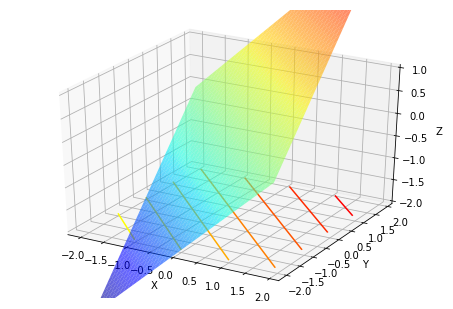

In [11]:
X = np.arange(-2, 2, 0.1)
Y = np.arange(-2, 2, 0.1)
X,Y=np.meshgrid(X,Y)
f=X+Y
plot3d(X, Y,f)


In [5]:
from sympy import symbols,pprint,integrate,pi,sqrt,sin,cos,diff
x,y=symbols("x y")
def doubleInt(f,X,xr,yr):
    Iy=integrate(f,[X[1],yr[0],yr[1]])
    I=integrate(Iy,[X[0],xr[0],xr[1]])
    print("the double integral of %s over [%s<%s<%s,%s<%s<%s] is %s" %(f,xr[0],X[0],xr[1],yr[0],X[1],yr[1],I))
    return I

In [6]:
W  = '\033[0m'  # white (normal)
K  = '\033[30m' # black
R  = '\033[31m' # red
G  = '\033[32m' # green
O  = '\033[1;33m' # orange
B  = '\033[34m' # blue
P  = '\033[35m' # purple
T =  '\033[1;33;47m' #Title

def doubleInt2(f,X,xr,yr):
    Iy=integrate(f,[X[1],yr[0],yr[1]])
    I=integrate(Iy,[X[0],xr[0],xr[1]])
    #print("  %s \t  %s" %(xr[1],yr[1]))
    print(' ','{}'.format(xr[1]),'     ','{}'.format(yr[1]))
    print("ʃ   d",R+'{}'.format(X[0]),K+"ʃ ",B+"{}".format(f),K+" d",R+"{}".format(X[1]),K+" = ","{}".format(I))   
    print(" %s \t %s" %(xr[0],yr[0]))
    return I

In [7]:
def doubleInt3(f,X,xr,yr):
    Iy=integrate(f,[X[1],yr[0],yr[1]])
    I=integrate(Iy,[X[0],xr[0],xr[1]])
    #print("  %s \t  %s" %(xr[1],yr[1]))
    yrs=str(yr[1])
    xrs=' '+str(xr[1])
    print(xrs.ljust(9,' ')+yrs)
    print("ʃ   d",R+'{}'.format(X[0]),K+"ʃ ",B+"{}".format(f),K+" d",R+"{}".format(X[1]),K+" = ","{}".format(I)) 
    
    yrs0=str(yr[0])
    xrs0=str(xr[0])
    print(xrs0.ljust(8,' ')+yrs0)
    return I

In [8]:
I=doubleInt3(y/x,[x,y],[1,3],[2,4])

 3       4
ʃ   d x ʃ  y/x  d y  =  6*log(3)
1       2


In [124]:
I=doubleInt3(x,[x,y],[-2,2],[0,sqrt(4-x**2)])

 2       sqrt(-x**2 + 4)
ʃ   d x ʃ  x  d y  =  0
-2      0


Example
---
  If $D = \{ (x, y) | 1 \leqslant x \leqslant 3, 2 \leqslant y \leqslant 4
  \},$
  
  <img src="imgs/8/cal7-33.png" width=40% /> 
  
  By Fubini's theorem, we have
  $$ \iint\limits_D \frac{y}{x} d A = \int_2^4 d y
     \int_1^3 \frac{y}{x} d x = 6 \ln 3 $$


In [3]:
I=doubleInt(y/x,[x,y],[1,3],[2,4])

the double integral of y/x over [1<x<3,2<y<4] is 6*log(3)


In [152]:
I=doubleInt2(y/x,[x,y],[1,3],[2,4])

  3       4
ʃ   d x ʃ  y/x  d y  =  6*log(3)
 1 	 2


Example
---
  If $D = \left\{ (x, y) | - 2 \leqslant x \leqslant 2, 0 \leqslant y
  \leqslant \sqrt{4 - x^2} \right\}$,
  
  <img src="imgs/8/cal7-34.png" width=40% /> 
  
  then

\begin{eqnarray*}
    \iint\limits_D  1 d A & = & \int^2_{- 2} d x
    \int^{\sqrt{4 - x^2}}_0 d y\\
    & = & \int^2_{- 2} \sqrt{4 - x^2} d x\\
    & = & \frac{1}{2} 2^2 \pi = 2 \pi
\end{eqnarray*}
  i.e. the area of half circle, $D$, is $2 \pi$.


In [72]:
I=doubleInt(1,[x,y],[-2,2],[0,sqrt(4-x**2)])

the double integral of 1 over [-2<x<2,0<y<sqrt(-x**2 + 4)] is 2*pi


In [153]:
I=doubleInt2(1,[x,y],[-2,2],[0,sqrt(4-x**2)])

  2       sqrt(-x**2 + 4)
ʃ   d x ʃ  1  d y  =  2*pi
 -2 	 0


Suppose that all the points $(x, y) $in $D$ can be transformed as:
$$ x = \phi (u, v), y = \psi (u, v) . $$
Then the double integral can be evaluated as followed:
$$ \iint\limits_D  f (x, y) d A = \underset{D}{\iint} f (\phi (u, v), \psi (u, v)) |J| d u d v $$
where $J$ is called the Jacobian of $(x, y)$ and equal to:

\begin{eqnarray*}
  J & = & \left| \left(\begin{array}{cc}
    \frac{\partial x}{\partial u} & \frac{\partial x}{\partial v}\\
    \frac{\partial y}{\partial u} & \frac{\partial y}{\partial v}
  \end{array}\right) \right|\\
  & = & \frac{\partial x}{\partial u} \cdot \frac{\partial y}{\partial v} -
  \frac{\partial x}{\partial v} \cdot \frac{\partial y}{\partial u}
\end{eqnarray*}

Especially, as in polar coordinate system, we have

$$ x = r \cos \theta, y = r \sin \theta $$

where $r$ is the distance between $(x, y)$ and origin and $\theta$ is the
angle between the line, connecting $(x, y)$ and origin, and $X$-axis. In this
case,

$$ \frac{\partial x}{\partial r} = \cos \theta, \frac{\partial x}{\partial
   \theta} = - r \sin \theta, \frac{\partial y}{\partial r} = \sin \theta
   \text{ and } \frac{\partial y}{\partial \theta} = r \cos \theta $$
and $|J| = r$ since


\begin{eqnarray*}
  J & = & \left| \left(\begin{array}{cc}
    \frac{\partial x}{\partial r} & \frac{\partial x}{\partial \theta}\\
    \frac{\partial y}{\partial r} & \frac{\partial y}{\partial \theta}
  \end{array}\right) \right|\\
  & = & \cos \theta \cdot r \cos \theta - (- r \sin \theta) \cdot \sin
  \theta\\
  & = & r
\end{eqnarray*}

Example
---
  If $D = \left\{ (x, y) | - 2 \le x \le 2, 0 \le y \le \sqrt{4 - x^2} \right\}$, then

\begin{eqnarray*}
    \iint\limits_D  1 d A & = & \int^2_{- 2} d x
    \int^{\sqrt{4 - x^2}}_0 d y\\
    & = & \int^2_{- 2} \sqrt{4 - x^2} d x\\
    & = & \frac{1}{2} 2^2 \pi = 2 \pi
  \end{eqnarray*}
  i.e. the area of half circle, $D$, is $2 \pi$.

  Find the volume of the semi-sphere above $X$-$Y$ plane with radius 2, i.e.
  $$ \iint\limits_{\{(x, y) | x^2 + y^2 \leqslant 4\}}
     \sqrt{4 - x^2 - y^2} d A $$
     
**Sol:** Since $\{(x, y) | x^2 + y^2 \leqslant 4\} = \{(r, \theta) |0 \leqslant
  r \leqslant 2, 0 \leqslant \theta \leqslant 2 \pi\}$
  
  <img src="imgs/8/cal7-35.png" width=40% />   
  and  $|J| = r$. Then

\begin{eqnarray*}
    \iint\limits_{\{(x, y) | x^2 + y^2 \le 4\}}
    \sqrt{4 - x^2 - y^2} d A & = & 
    \iint\limits_{\{(r, \theta) |0 \le r\le 2, 0 \leqslant \theta \le 2 \pi\}} 
    \sqrt{4 - r^2} \cdot r d r d \theta\\
    & = & \int^{2 \pi}_0 d \theta \int^2_0 r \sqrt{4 - r^2} d r\\
    & = & \left.\int^{2 \pi}_0 \left( - \frac{1}{3} (4 - r^2)^{3 / 2} \right)
    \right| ^2_0 d \theta\\
    & = & \int^{2 \pi}_0 \frac{8}{3} d \theta\\
    & = & \frac{16 \pi}{3}
  \end{eqnarray*}
  i.e. half of volume of ball with radius $2$, reference the following:
  
  <img src="imgs/8/cal7-36.png" width=40% /> 

In [125]:
r,t=symbols("r t")
I=doubleInt2(r*sqrt(4-r**2),[r,t],[0,2],[0,2*pi])

  2       2*pi
ʃ   d r ʃ  r*sqrt(-r**2 + 4)  d t  =  16*pi/3
 0 	 0


Example
---
  Evaluate the integral $\int^{\infty}_0 e^{- x^2} d x$.
  
**Sol:** Let $I = \int^{\infty}_0 e^{- x^2} d x$. Then $I =
  \int^{\infty}_0 e^{- y^2} d y$ by changing the dummy variable $x$ into $y$.
  Consider the product:

\begin{eqnarray*}
    I^2 & = & I \cdot I\\
    & = & \int^{\infty}_0 e^{- x^2} d x \cdot \int^{\infty}_0 e^{- y^2} d y\\
    & = & \int^{\infty}_0 \int^{\infty}_0 e^{- x^2 - y^2} d x d y\\
    & = & \int^{\pi / 2}_0 \int^{\infty}_0 e^{- r^2} \cdot r d r d \theta\\
    & = & \int^{\pi / 2}_0 \frac{1}{2} d \theta = \frac{\pi}{4}
  \end{eqnarray*}

In the third and forth equalities, the domain is as follows:

\begin{eqnarray*}
    D & = & \{ (x, y) | 0 \leqslant x, y < \infty \}\\
    & = & \{ (r, \theta) | 0 \leqslant r < \infty, 0 \leqslant \theta
    \leqslant \pi / 2 \}
  \end{eqnarray*}
  reference the following:
<img src="imgs/8/cal7-37.png" width=40% />  
i.e. the whole first quadrant. This implies $I = \frac{\sqrt{\pi}}{2}$ .




**Note:** The related formula are listed:

**1.** By symmetry, we have

$$ \int^{\infty}_{- \infty} e^{- x^2} d x = 2 \int^{\infty}_0 e^{- x^2} d x
     = \sqrt{\pi} $$
**2.** To prove

$$ \int^{\infty}_{- \infty} \frac{1}{\sqrt{2 \pi} \sigma} e^{\frac{- (x -
     \mu)^2}{2 \sigma^2}} d x = 1 $$

change the variable by substitution of $t = \frac{x - \mu}{\sqrt{2} \sigma}$
  and $d t = \frac{d x}{\sqrt{2} \sigma}$. Also

$$ x \left| \underset{- \infty}{\overset{\infty}{\uparrow}}\right. \Longrightarrow t =
     \frac{x - \mu}{\sqrt{2} \sigma} \left| \underset{-
     \infty}{\overset{\infty}{\uparrow}} \right.$$

Then

\begin{eqnarray*}
    \int^{\infty}_{- \infty} \frac{1}{\sqrt{2 \pi} \sigma} e^{\frac{- (x -
    \mu)^2}{2 \sigma^2}} d x & = & \int^{\infty}_{- \infty}
    \frac{1}{\sqrt{\pi}} e^{- t^2} d t\\
    & = & \frac{1}{\sqrt{\pi}} \cdot \sqrt{\pi} = 1
  \end{eqnarray*}

**3.** As the similar procedure, we can also calculate$\int^{\infty}_{-
  \infty} \frac{x}{\sqrt{2 \pi} \sigma} e^{\frac{- (x - \mu)^2}{2 \sigma^2}} d
  x = \mu$. By using the same substitution in ii), $t = \frac{x -
  \mu}{\sqrt{2} \sigma}$, we have:

\begin{eqnarray*}
    \int^{\infty}_{- \infty} \frac{x}{\sqrt{2 \pi} \sigma} e^{\frac{- (x -
    \mu)^2}{2 \sigma^2}} d x & = & \int^{\infty}_{- \infty} \frac{\mu}{\sqrt{2
    \pi} \sigma} e^{\frac{- (x - \mu)^2}{2 \sigma^2}} d x + \int^{\infty}_{-
    \infty} \frac{x - \mu}{\sqrt{2 \pi} \sigma} e^{\frac{- (x - \mu)^2}{2
    \sigma^2}} d x\\
    & = & \mu + \int^{\infty}_{- \infty} \frac{t}{\sqrt{\pi}} e^{- t^2} d t\\
    & = & \mu
  \end{eqnarray*}

The last result holds since the definite integral of odd function over
interval symmetry with respect to $0$. 

We can also describe the result by the graphs of such functions.



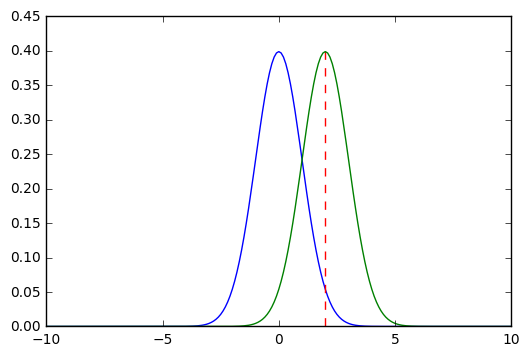

In [130]:
x=np.linspace(-10,10,201)
def expf(x,mu=0,sigma=1):
    return np.exp(-(x-mu)**2/2/sigma**2)/(np.sqrt(2*np.pi*sigma))
plt.plot(x,expf(x))
plt.plot([2,2],[0,0.4],'r--')
plt.plot(x,expf(x,mu=2))

Obviously, the latter is as the same \ as the former but forward
$\color{red}{2}$ units. Since the limits of both are the same, from $-
\infty$ to $\infty$, it is no doubt that both the integrals for
$$ \frac{1}{\sqrt{2 \pi}} e^{- \frac{x^2}{2}} \text{ and } \frac{1}{\sqrt{2
   \pi}} e^{- \frac{(x - 2)^2}{2}}  $$
are the same. 

Exercise
---
  Integrate $y \sqrt{x^3 + 1}$ over $D$:
  
 <img src="imgs/8/cal7-39.png" width=40% />  
   Then

\begin{eqnarray*}
  \iint\limits_D y \sqrt{x^3 + 1} d A & = & \int_0^2 \int^x_0 y
  \sqrt{x^3 + 1} d y d x\\
  & = & \left. \int_0^2 \sqrt{x^3 + 1}  \frac{y^2}{2} \right|^x_0 d x\\
  & = & \int_0^2 \frac{x^2}{2} \sqrt{x^3 + 1} d x\\
  & = & \frac{1}{6} \int_0^2 \sqrt{x^3 + 1} d (x^3 + 1)\\
  & = & \left. \frac{1}{6} \cdot \frac{2}{3} \cdot (x^3 + 1)^{3 / 2}
  \right|^2_0\\
  & = & \frac{26}{9}
\end{eqnarray*}


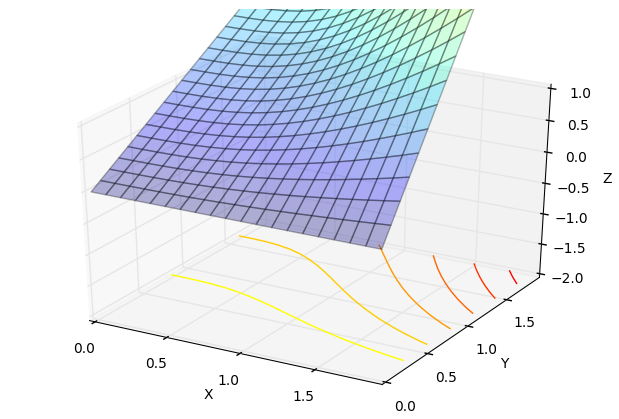

In [65]:
X = np.arange(0, 2, 0.1)
Y = np.arange(0, 2, 0.1)
X,Y=np.meshgrid(X,Y)
f=Y*np.sqrt(X**3+1)
plot3d(X, Y,f)

In [17]:
I=doubleInt(y*sqrt(1+x**3),[x,y],[0,2],[0,x])

the double integral of y*sqrt(x**3 + 1) over [0<x<2,0<y<x] is 26/9


Exercise
---
  Integrate $f (x, y) = y / (1 + x)$ over $D$:
  
 <img src="imgs/8/cal7-40.png" width=40% /> 
Then

\begin{eqnarray*}
  \iint_D\frac{y}{1 + x} d A & = & \int_0^1
  \int^{\sqrt{x}}_{- x} \frac{y}{1 + x} d y d x\\
  & = & \left. \int_0^1 \frac{1}{1 + x}  \frac{y^2}{2} \right|^{\sqrt{x}}_{-
  x} d x\\
  & = & \frac{1}{2} \int_0^1 \frac{x - x^2}{1 + x} d x\\
  & = & \frac{1}{2} \int_0^1 \left( - x + 2 - \frac{2}{1 + x} \right) d x\\
  & = & \left. \frac{1}{2} \left( - \frac{x^2}{2} + 2 x - 2 \ln |1 + x|
  \right) \right|^1_0\\
  & = & \frac{1}{2} (3/2 - 2 \ln 2)
\end{eqnarray*}

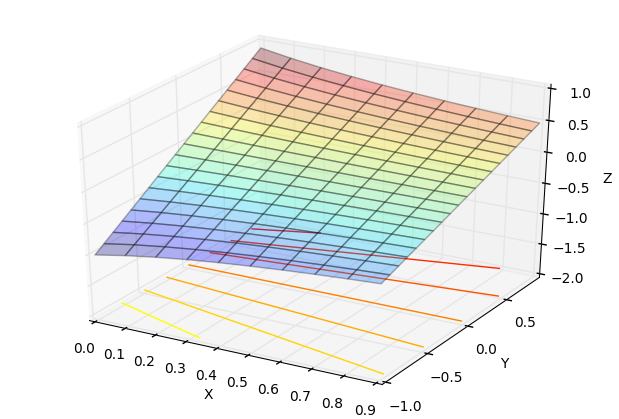

In [66]:
X = np.arange(0, 1, 0.1)
Y = np.arange(-1, 1, 0.1)
X,Y=np.meshgrid(X,Y)
f=Y/(1+X)
plot3d(X, Y,f)

In [19]:
I=doubleInt(y/(1+x),[x,y],[0,1],[-x,sqrt(x)])

the double integral of y/(x + 1) over [0<x<1,-x<y<sqrt(x)] is -log(2) + 3/4


Applications for Changing variables
---

In probability and statistic, the techniques of change of variables are
usually used to find the probability density functions (abbr,. as p.d.f.) of
new random variables.

Example
---
  Suppose that one variable, $x$, is chosen randomly and uniformly from $[0,
  1]$, and another variable, $y$, is also in such similar condition. What is
  the probability that $x \leqslant y$?

**Sol:** Let $D$ the domain that $x \leqslant y$. Then The answer of this
  problem can be calculated by the following double integral:

\begin{eqnarray*}
    \underset{D}{\iint} 1 d x d y & = & \underset{\{ 0 \leqslant x
    \leqslant y \leqslant 1 \}}{\iint} 1 d x d y\\
    & = & \int^1_0 d y \int^y_0 d x\\
    & = & \int^1_0 y d y\\
    & = & \frac{1}{2}
  \end{eqnarray*}
  Another method is by changing variables from $(x, y)$ to $(u, v)$ where $u =
  x + y$ and $v = x - y$. In this case, the double integral has to be changed
  as:

**1.** variables change:

\begin{eqnarray*}
      u = x + y, v = x - y & \Rightarrow & x = \frac{u + v}{2} \text{ and } y =
      \frac{u - v}{2}\\
      |J| & = & \left. \middle| \frac{\partial (x, y)}{\partial (u, v)}
      \right| = \frac{1}{2}
    \end{eqnarray*}
**2.** Domain change: reference the following picture
 <img src="imgs/8/cal7-42.png" width=60% /> 
**3.**  The double integral is:

\begin{eqnarray*}
      \iint_D1 d x d y & = & \int^0_{- 1} d v \int^{2 + v}_{-
      v} \frac{1}{2} d u\\
      & = & \frac{1}{2}
    \end{eqnarray*}




Example
---
  Change the following double integral in $(X, Y)$ into $(U, V)$:
$$ \int^{\infty}_0 \int^{\infty}_0 \frac{1}{\Gamma (\alpha) \Gamma (\beta)}
     x^{\alpha - 1} y^{\beta - 1} e^{- x - y} d x d y, 0 \leqslant x, y
     \text{ and } 0 < u, v $$
  where
  $$ u = x + y \text{ and } v = \frac{x}{x + y} $$
**Ans:**
  $$ \int^1_0 \color{brown}{\frac{\Gamma (\alpha + \beta)}{\Gamma (\alpha)
     \Gamma (\beta)} v^{\alpha - 1} (1 - v)^{\beta - 1}} d v \int^{\infty}_0
     \color{brown}{\frac{1}{\Gamma (\alpha + \beta)} u^{\alpha + \beta - 1}
     e^{- u}} d u $$
  Note that
\begin{eqnarray*}
    0 \leqslant x, y & \Rightarrow & 0 \leqslant u \text{ and } 0 \leqslant v <
    1
  \end{eqnarray*}
 <img src="imgs/8/cal7-43.png" width=60% /> 

Example
---
  Change the following double integral in $(X, Y)$ into $(U, V)$:

$$ \underset{\{0 \leqslant x, y\}}{\iint} \frac{1}{4} e^{- \frac{x +
     y}{2}} d x d y $$
  where $u = x + y$ and $v = y$.
  

Note that

\begin{eqnarray*}
    \begin{array}{c}
      0 \leqslant x\\
      0 \leqslant y
    \end{array} & \Rightarrow & \begin{array}{c}
      0 \leqslant x = u - v\\
      0 \leqslant y = v
    \end{array}\\
    & \Rightarrow & \begin{array}{c}
      0 \leqslant v\\
      v \leqslant u
    \end{array}
  \end{eqnarray*}
  and

$$  \left| \frac{\partial (x, y)}{\partial (u, v)} \right| = \left|
     \left(\begin{array}{cc}
       1 & - 1\\
       0 & 1
     \end{array}\right) \right| = 1 $$
  
then

\begin{eqnarray*}
    \underset{\{0 \leqslant x, y\}}{\iint} \frac{1}{4} e^{- \frac{x +
    y}{2}} d x d y & = & \int_0^{\infty} d u \int^u_0 \frac{1}{4} e^{- u / 2}
    d v\\
    & = & \int_0^{\infty} \frac{1}{4} u e^{- u / 2} d u
  \end{eqnarray*}

i.e. sum of two independent $\chi^2_2$ is $\chi^2_4$.




In Monte-Carlo simulation, the data generating by normal density are usually
used. But how can they be generated? The answer is very simple: they can be
generated by the data comes from uniform distribution on $[0, 1]$.

Example (Monte-Carlo Simulation, Normal Data)
---
Change the following double integral in $(X, Y)$
  into $(U, V)$:

$$ \underset{\{0 < x, y < 1\}}{\iint} 1 d x d y $$
  where $u = (- 2 \ln x)^{1 / 2} \cos 2 \pi y$ and $v = (- 2 \ln x)^{1 / 2}
  \sin 2 \pi y$.

**1.** Since $0 < x, y < 1$, we have

\begin{eqnarray*}
      \begin{array}{c}
        - 2 \ln x \in (0, \infty)\\
        2 \pi y \in (0, 2 \pi)
      \end{array} \begin{array}{c}
        \\        
      \end{array} & \Rightarrow & \begin{array}{c}
        u, v \in \mathbb{R}
      \end{array}
    \end{eqnarray*}

**2.** change the variable-pair, from $(x,y)$ to $(u,v)$:

\begin{eqnarray*}
      \begin{array}{c}
        u = (- 2 \ln x)^{1 / 2} \cos 2 \pi y\\
        v = (- 2 \ln x)^{1 / 2} \sin 2 \pi y
      \end{array} & \Rightarrow & u^2 + v^2 = - 2 \ln x, \frac{v}{u} = \tan 2
      \pi y\\
      & \Rightarrow & x = \exp (- (u^2 + v^2) / 2), y = \frac{1}{2 \pi}
      \tan^{- 1} \frac{v}{u}
    \end{eqnarray*}

**3.** evaluate  the Jacobian:

\begin{eqnarray*}
      J & = & \left| \left(\begin{array}{cc}
        \frac{\partial x}{\partial u} & \frac{\partial x}{\partial v}\\
        \frac{\partial y}{\partial u} & \frac{\partial y}{\partial v}
      \end{array}\right) \right|\\
      & = & \mathbf{\left| \left(\begin{array}{cc}
        - u e^{- (u^2 + v^2) / 2} & - v e^{- (u^2 + v^2) / 2}\\
        \frac{- v}{2 \pi (u^2 + v^2)} & \frac{- u}{2 \pi (u^2 + v^2)}
      \end{array}\right) \right|}\\
      & = & \frac{(u^2 + v^2)}{2 \pi (u^2 + v^2)} e^{- (u^2 + v^2) / 2}\\
      & = & \frac{1}{\sqrt{2 \pi}} e^{- u^2 / 2} \cdot \frac{1}{\sqrt{2 \pi}}
      e^{- v^2 / 2}
    \end{eqnarray*}

**4.** change the double integral with $(x,y)$-pair to $(u,v)$-pair

\begin{eqnarray*}
      \underset{\{0 < x, y < 1\}}{\iint} 1 d x d y & = & \underset{\{(u, v)
      \in \mathbb{R^2}\}}{\iint} J d u d v\\
      & = & \int_{\{u \in \mathbb{R}\}} \frac{1}{\sqrt{2 \pi}} e^{- u^2 / 2}
      d u \int_{\{v \in \mathbb{R}\}} \frac{1}{\sqrt{2 \pi}} e^{- v^2 / 2} d
      v
    \end{eqnarray*}

this means that $U, V$ are standard normal random variables and is independent, since integrand is in the form 
$f_U(u)g_V(v)$.


During the simulation, some few data in front are always to be discarded for
the randomcy.

Example ($t$-distribution data)
---
Change the following double integral in $(X, Y)$
  into $(T, V) $:

$$ \int^{\infty}_{- \infty} \frac{1}{\sqrt{2 \pi}} e^{- \frac{x^2}{2}} d x
     \int^{\infty}_0 \frac{y^{r / 2 - 1} e^{- y / 2}}{\Gamma (r / 2) 2^{r /
     2}} d y $$
  where

$$ t = \frac{x}{\sqrt{\frac{y}{r}}} \text{ and } v = y $$

Moreover, we have

\begin{eqnarray*}
    \int^{\infty}_0 \frac{1}{\sqrt{2 \pi}} e^{- x^2/2} \cdot
    \frac{y^{r / 2 - 1} e^{- y / 2}}{\Gamma (r / 2) 2^{r / 2}} d y & = &
    \frac{\Gamma ((r + 1) / 2)}{\sqrt{\pi r} \Gamma (r / 2)} \frac{1}{(1 + u^2
    / 2)^{(1 + r) / 2}}\\
    & = & f_T (t) \text{ where } - \infty < t < \infty
  \end{eqnarray*}

This is called the p.d.f of $t$-distribution. 



Example ($F$-distribution data)
---
Change the following double integral in $(X, Y)$
  into $(F, V) $

$$ \underset{\{0 < x, y\}}{\iint} \frac{x^{r / 2 - 1} y^{s / 2 - 1} e^{-
     (x + y) / 2}}{\Gamma (r / 2) \Gamma (s / 2) 2^{(r + s) / 2}} d x d y $$
  where

$$ f = \frac{x / r}{y / s} \text{ and } v = y $$
  Moreover, we have

\begin{eqnarray*}
    \int_{\{0 < y\}} \frac{x^{r / 2 - 1} y^{s / 2 - 1} e^{- (x + y) /
    2}}{\Gamma (r / 2) \Gamma (s / 2) 2^{(r + s) / 2}} d x d y & = & f_F (f)\\
    & = & \frac{\Gamma ((r + s) / 2) (r / s)^{r / 2}}{\Gamma (r / 2) \Gamma
    (s / 2) (1 + r f / s)^{(r + s) / 2}} f^{r / 2 - 1}, \text{ where } 0 < f
  \end{eqnarray*}


Exercise
---
Suppose that one variable, $x$, is chosen randomly and uniformly from $[0,
  1]$, and another variable, $y$, is also in such similar condition. What is
  the probability that $x \leqslant 2 y$, i.e. the value of $x$ is less than
  twice of value of $y$?


This case is evaluated as follows:

\begin{eqnarray*}
  \wp (0 \leqslant x \leqslant 2 y \leqslant 1) & = & \iint_D
  1 d x d y\\
  & = & \int^1_0 d x \int^1_{y / 2} 1 d x\\
  & = & \int^1_0 (1 - y / 2) d y\\
  & = & 3 / 4
\end{eqnarray*}


Triple Integrals
---

Similar to last section, we can consider the multiple integrations for
functions with three variables. If $w = f (x, y, z)$ is continuous and $f (x,
y, z)$ is nonnegative for all $(x, y, z)$ in a solid region $R$ of subset in
$\mathbb{R}^3$, then the triple integral of $f (x, y, z)$ and above $X - Y$
over $R$ is defined as
$$\iiint_Rf (x, y, z) d V = \lim_{\|
   \Delta \| \rightarrow 0} \sum_{i = 1}^n f (x_i, y_i, z_i) \Delta V_i $$


where $\Delta V_i = \Delta x_i \Delta y_i \Delta z_i $, $\Delta \ast_i$being
the length of the partition subinterval in each direction respectively,  is
the element of volume and $\| \Delta \|$ is the longest length among $\Delta
\ast_i$'s. Fubini's theorem can be used to evaluate the triple integrals:

Theorem (Fibini's Theorem)
---
 If $f (x, y, z)$ is continuous over $V$ and
  $$ R \text{=} \{ (x, y, z) | a \leqslant x \leqslant b, g_1 (x) \leqslant y
     \leqslant g_2 (x), h_1 (x, y) \leqslant z \leqslant h_2 (x, y) \}, $$
  then
$$ \iiint_{R}f (x, y, z) d V = \int_a^b d
     x \int_{g_1 (x)}^{g_{_2 (x)}} d y \int_{h_1 (x, y)}^{h_2 (x, y)} f (x, y,
     z) d z $$


Certainly, the order of integrations can be changed as double integrals if
necessary. Note that if $f (x, y, z) \equiv 1$ then the value of triple
integral is equal to the volume of $R$.

Example
---
  If $R = \{ (x, y) | 1 \leqslant x \leqslant 3, 2 \leqslant y \leqslant 4, 0
  \leqslant z \leqslant 2 \},$ then

\begin{eqnarray*}
\iiint_R 1 d V & = & \int_2^4 d y
    \int_1^3 d x \int_0^2 d z\\
    & = &  2 \cdot 2 \cdot 2
  \end{eqnarray*}

This result is equal to the volume of cubic solid.


Example
---
  Evaluate the triple integral

\begin{eqnarray*}
    & \int^2_1 \int^{x^2}_x \int_0^{x + y} (x + 1) (y + z) d V & \\
    = & \int^2_1 d x \int^{x^2}_x (x + 1) \left( \frac{3 y^2 + 4 xy + x^2}{2}\right)
    d y  & \\
    = & \int^2_1 (x + 1) \cdot \frac{x^6 + 2 x^5 + x^4 - 4 x^3}{2} d x & \\
    = & \frac{23577}{560} & 
  \end{eqnarray*}



Example
---
  Suppose that The solid region $R$ is given by

$$ R = \left\{ (x, y, z) \in \mathbb{R}^3  \middle| 0 \leqslant x \leqslant
     \sqrt{\frac{\pi}{2}}, x \leqslant y \leqslant \sqrt{\frac{\pi}{2}}, 0
     \leqslant z \leqslant 2 \right\}   $$


Evaluate the triple integral

$$ \iiint\limits_R\sin (y^2) d V $$


**Sol:**


  As mentioned in the section of integration technique, $\sin (y^2)$ can not
  be integrated directly by any method. Therefore we have to arrange the
  orders of integration carefully. Note that

$$ R = \left\{ (x, y, z) \in \left.\mathbb{R}^3 \right| 0 \leqslant y \leqslant
     \sqrt{\frac{\pi}{2}}, 0\le x \le y, 0 \leqslant z \leqslant 2
     \right\}$$
  then by Fubini's theorem, the triple integral is evaluated as:

\begin{eqnarray*}
    & \iiint_R\sin (y^2) d V & \\
    = & \int_0^{\sqrt{\frac{\pi}{2}}} d y \int_0^y d x \int_0^2 \sin (y^2) d z
    & \\
    = & \int_0^{\sqrt{\frac{\pi}{2}}} 2 \cdot y \cdot \sin (y^2) d y & \\
    = & 1 & 
  \end{eqnarray*}

In [59]:
from sympy import symbols,pprint,integrate,pi,sqrt,sin,cos,diff

def tripleInt(f,X,xr,yr,zr):
    Iz=integrate(f,[X[2],zr[0],zr[1]])
    Iy=integrate(Iz,[X[1],yr[0],yr[1]])
    Ix=integrate(Iy,[X[0],xr[0],xr[1]])
    return Ix

In [60]:
x,y,z =symbols('x y z')
tripleInt(sin(y**2),[y,x,z],[0,sqrt(pi/2)],[0,y],[0,2])

1

In [102]:
def tripleInt2(f,X,xr,yr,zr):
    Iz=integrate(f,[X[2],zr[0],zr[1]])
    Iy=integrate(Iz,[X[1],yr[0],yr[1]])
    Ix=integrate(Iy,[X[0],xr[0],xr[1]])
    print("  %s \t  %s  \t  %s" %(xr[1],yr[1],zr[1]))
    print("ʃ   d",R+'{}'.format(X[0]),
        K+"ʃ   d",R+'{}'.format(X[1]),
        K+"ʃ ",B+"{}".format(f),K+" d",R+"{}".format(X[2]),K+" = ","{}".format(Ix))   
    print(" %s \t %s  \t %s" %(xr[0],yr[0],zr[0]))
    return Ix

In [1]:
def tripleInt3(f,X,xr,yr,zr):
    Iz=integrate(f,[X[2],zr[0],zr[1]])
    Iy=integrate(Iz,[X[1],yr[0],yr[1]])
    Ix=integrate(Iy,[X[0],xr[0],xr[1]])
    zrs=' '+str(zr[1])
    yrs=str(yr[1])
    xrs=' '+str(xr[1])
    print(xrs.ljust(9,' ')+O+yrs.ljust(7,' ')+K+zrs)
    #print("  %s \t  %s  \t  %s" %(xr[1],yr[1],zr[1]))
    print("ʃ   d",R+'{}'.format(X[0]),
        K+"ʃ   d",R+'{}'.format(X[1]),
        K+"ʃ ",B+"{}".format(f),K+"  d",R+"{}".format(X[2]),K+" = ","{}".format(Ix))   
    zrs1=' '+str(zr[0])
    yrs1=str(yr[0])
    xrs1=' '+str(xr[0])
    print(xrs1.ljust(8,' ')+O+yrs1.ljust(7,' ')+K+zrs1)
    #print(" %s \t %s  \t %s" %(xr[0],yr[0],zr[0]))
    return Ix

In [131]:
I=tripleInt3(x**2*y,[x,y,z],[0,2],[0,2],[0,2])

 2       2       2
ʃ   d x ʃ   d y ʃ  x**2*y   d z  =  32/3
 2      2       2


Example
---
  Evaluate the following triple integral:
$$ \iiint_V \frac{d V}{(1 + x + y + z)^{3 / 2}} $$
  where $V$ is the domain bounded by the plane, $x + y + z = 1$, in the first
  octant.

<img src="imgs/8/cal7-45.png" width=60% />   
  

\begin{eqnarray*}
    I & = & \iiint\limits_V \frac{d V}{(1 + x + y + z)^{3 / 2}}\\
    & = & \int^1_0 d x \int^{1 - x}_0 d y \int^{1 - x - y}_0 \frac{d z}{(1 +
    x + y + z)^{3 / 2}}\\
    & = & \left. \int^1_0 d x \int^{1 - x}_0 \frac{- 2}{(1 + x + y + z)^{1 /
    2}} \right|^{z = 1 - x - y}_{z = 0} d y\\
    & = & \int^1_0 d x \int^{1 - x}_0 \left( \frac{2}{(1 + x + y)^{1 / 2}} -
    \sqrt{2} \right) d y\\
    & = & \left. \int^1_0 4 \sqrt{1 + x + y} - \sqrt{2} y \right|^{y = 1 -
    x}_{y = 0} d x\\
    & = & \int^1_0 (4 \sqrt{2} - \sqrt{2} (1 - x) - 4 \sqrt{1 + x}) d x\\
    & = & 4 \sqrt{2} - \frac{\sqrt{2}}{2} - \frac{8}{3} (2^{3 / 2} - 1)=\frac{8}{3}-\frac{11}{6}\sqrt2
  \end{eqnarray*}

In [97]:
I=tripleInt2(x**2*y,[x,y,z],[0,2],[0,2],[0,2])

  2 	  2  	  2
ʃ   d x ʃ   d y ʃ  x**2*y  d z  =  32/3
 0 	 0  	 0


32/3

In [82]:
I=tripleInt2(sqrt(1+x+y+z)**(-3),[x,y,z],[0,1],[0,1-x],[0,1-y-x])

 1        -x + 1  -x - y + 1
ʃ   d x ʃ   d y ʃ  (x + y + z + 1)**(-3/2)   d z  =  -11*sqrt(2)/6 + 8/3
 0 	 0  	 0


Exercise
---
  Evaluate the following triple integrals:
1. $\iiint\limits_V x^2 y d V$  where $V = \{(x, y, z) \in
    \mathbb{R}^3 | 0 \leqslant x, y, z \leqslant 2\}$;
- $\iiint\limits_V x^2 y d V$  where $V = \{(x, y, z) \in
    \mathbb{R}^3 | 0 \leqslant x \leqslant y \leqslant z \leqslant 2\}$;
- $\iiint\limits_V  \frac{y}{x} d V$  where $V = \{(x, y, z) \in
    \mathbb{R}^3 | 1 \leqslant x \leqslant y \leqslant z \leqslant 2\}$;


In [132]:
tripleInt3(x*x*y,[x,y,z],[0,2],[x,2],[y,2])

 2       2       2
ʃ   d x ʃ   d y ʃ  x**2*y   d z  =  32/45
 2      2       2


32/45

In [155]:
tripleInt2(x**2*y,[z,y,x],[0,2],[0,z],[0,y])

  2 	  z  	  y
ʃ   d z ʃ   d y ʃ  x**2*y  d x  =  32/45
 0 	 0  	 0


32/45

In [156]:
tripleInt2(y/x,[z,y,x],[1,2],[1,z],[1,y])

  2 	  z  	  y
ʃ   d z ʃ   d y ʃ  y/x  d x  =  -13/18 + 4*log(2)/3
 1 	 1  	 1


-13/18 + 4*log(2)/3

Triple integrals in other coordinates
---

Recall that the relations between Cartesian coordinates, $(x, y, z)$, and
cylindrical coordinates, $(r, \theta, z)$, are given by:

\begin{eqnarray*}
  x = r \cos \theta &  & \\
  y = r \sin \theta &  & \\
  z = z &  & 
\end{eqnarray*}
<img src="imgs/8/cal7-46.png" width=60% />   

And the relations between Cartesian coordinates, $(x, y, z)$, and cylindrical
coordinates{\index{cylindrical coordinates}}, $(\rho, \theta, \phi)$, are
given by:

\begin{eqnarray*}
  x = \rho \cos \theta \cos \phi &  & \\
  y = \rho \sin \theta \cos \phi &  & \\
  z = \rho \sin \phi &  & 
\end{eqnarray*}

Since the Jacobian matrix, $J$, between two different coordinates is defined
as

\begin{eqnarray*}
  \frac{\partial (x^i)}{\partial (u^j)} & = & \left(\begin{array}{c}
    \frac{\partial x^i}{\partial u^j}
  \end{array}\right)_{i, j}
\end{eqnarray*}

we have the following \ integration rules:

Theorem
---
$$\mathbf{ \iiint\limits_Rf (x, y, z) d V =
     \underset{R}{\iiint} f (x (u, v, w), y (u, v, w), z (u, v, w))
     |J| d u d v d w} $$
  
  
  where $|J|$ is the absolute value of determinant of $J$. In cylindrical
  coordinates, we have
  $$\mathbf{ \iiint\limits_R f (x, y, z) d V =
     \underset{R}{\iiint} f (r \cos \theta, r \sin \theta, z) r d r d
     \theta d z }$$
  In spherical coordinates{\index{spherical coordinates}}, we have
$$\mathbf{ \iiint\limits_Rf (x, y, z) d V =
     \iiint\limits_R f (\rho \cos \theta \cos \phi, \rho \sin
     \theta \cos \phi, \rho \sin \phi) \rho^2 \sin \phi d \rho d \theta d \phi}$$


Example
---
  Find the volume of the solid bounded by $z = x^2 + y^2$ and $z = 4$.


The solid region can be represented in cylindrical coordinates as:

\begin{eqnarray*}
      0 \leqslant z \leqslant 4 &  & \\
      0 \leqslant r \leqslant \sqrt{z} &  & \\
      0 \leqslant \theta \leqslant 2 \pi &  & 
    \end{eqnarray*}

Then the volume of the solid is equal to

\begin{eqnarray*}
      & \iiint_R1 d V & \\
      = & \int_0^4 d z \int_0^{\sqrt{z}} r d r \int_0^{2 \pi} d \theta & \\
      = & \int_0^4 \pi z d z & \\
      = & 8 \pi & 
\end{eqnarray*}


In [133]:
r,t,p=symbols("r t p")
tripleInt3(r,[z,t,r],[0,4],[0,2*pi],[0,sqrt(z)])

 4       2*pi    sqrt(z)
ʃ   d z ʃ   d t ʃ  r   d r  =  8*pi
 4      2*pi    sqrt(z)


8*pi

Example
---
  Find the volume of the solid bounded by $z^2 = x^2 + y^2, x^2 + y^2 + z^2 =
  4$ and above $X - Y$ plane.
  
**Sol:**
  
In spherical coordinates, the solid is represented as

$$ \begin{array}{l}
         0 \leqslant \rho \leqslant 2\\
         0 \leqslant \phi \leqslant \frac{\pi}{4}\\
         0 \leqslant \theta \leqslant 2 \pi
       \end{array} $$

Then the volume of the solid is equal to

\begin{eqnarray*}
  & \iiint_R 1 d V & \\
  = & \int_0^2 \rho^2 d \rho \int_0^{\frac{\pi}{4}} \sin \phi d \phi \int_0^{2
  \pi} d \theta & \\
  = & 2 \pi \int_0^2 \rho^2 (1 - \frac{1}{\sqrt{2}}) d \rho & \\
  = & \frac{16}{3} \left( 1 - \frac{1}{\sqrt{2}} \right) \pi & 
\end{eqnarray*}

In [91]:
I=tripleInt3(r*r*sin(p),[r,p,t],[0,2],[0,pi/4],[0,2*pi])

 2        pi/4    2*pi
ʃ   d r ʃ   d p ʃ  r**2*sin(p)   d t  =  -8*sqrt(2)*pi/3 + 16*pi/3
 2       pi/4    2*pi


Exercise
---
  Resolve the last problem with the cylindrical coordinates.
**Sol:** Since the points in the solid are satisfied the following
inequalities:

\begin{eqnarray*}
  z^2 \leqslant x^2 + y^2 &  & \\
  x^2 + y^2 + z^2 \leqslant 4 &  & \\
  z \geqslant 0 &  & 
\end{eqnarray*}

the ranges for \ $(r, \theta, z)$ are:

\begin{eqnarray*}
  r \leqslant z \leqslant \sqrt{4 - r^2} &  & \\
  0 \leqslant r \leqslant \sqrt{2} &  & \\
  0 \leqslant \theta \leqslant 2 \pi &  & 
\end{eqnarray*}

Therefore the volume is

\begin{eqnarray*}
  & \iiint_R 1 d V & \\
  = & \int_0^{\sqrt{2}} r d r \int_0^{2 \pi} d \theta \int^{\sqrt{4 - r^2}}_r
  d z & \\
  = & 2 \pi \int_0^{\sqrt{2}} (\sqrt{4 - r^2} - r) r d r & \\
  = & \frac{16}{3} \left( 1 - \frac{1}{\sqrt{2}} \right) \pi & 
\end{eqnarray*}}


Exercise
---
  Evaluate the following triple integrals:

**1.**

$$ \int^2_{- 2} \int^{\sqrt{4 - x^2}}_{- \sqrt{4 - x^2}} \int_0^{\sqrt{4
       - x^2 - y^2}} (y^2 + z^2) z d z d y d x $$
    Hint: the domain is half upper ball.

**2.**

$$ \int^{\sqrt{2}}_0 \int^{\sqrt{2 - x^2}}_0 \int_{2 x^2 + y^2}^{4 -
    y^2} y d z d y d x$$

Hint: by cylindrical coordinates, $x = r \cos \theta$ and $y = r \sin
    \theta$.



**1.** by spherical integration

\begin{eqnarray*}
    I & = & \int_0^2 \rho^5 d \rho \int_0^{2 \pi} d \theta
    \int_0^{\frac{\pi}{2}} (\sin^2 \phi + \sin^2 \theta \cos^2 \phi) \sin^2
    \phi d \phi\\
    & = & \frac{32}{3} \cdot \int_0^{2 \pi} \left( \frac{3 \pi}{8} \sin^2
    \theta + \frac{\pi}{8} \right) d \theta\\
    & = & 8 \pi^2
  \end{eqnarray*}

**2.** by cylindrical integration

\begin{eqnarray*}
    I & = & \int^{\sqrt{2}}_0 \int^{\sqrt{2 - x^2}}_{- \sqrt{2 - x^2}} (4 - 2
    x^2 - 2 y^2) y d y d x\\
    & = & \int^{\sqrt{2}}_0 d r \int_0^{\frac{\pi}{2}} (4 - 2 r^2) r \sin
    \theta \cdot r d \theta\\
    & = & \int^{\sqrt{2}}_0 (4 r^2 - 2 r^4) d r\\
    & = & \frac{16 \sqrt{2}}{15}
  \end{eqnarray*}

Exercise
---
Find the volume of solid bounded by

\begin{eqnarray*}
    V : x^{2 / 3} + y^{2 / 3} + z^{2 / 3} \leqslant 2^2 &  & 
  \end{eqnarray*}

This volume is equal to the following triple integral:

\begin{eqnarray*}
  I & = & \iiint_V 1 d V\\
  & \Downarrow & (x = X^3, y = Y^3, z = Z^3, J = \left( \frac{\partial
  x^i}{\partial X^j} \right) = 27 X^2 Y^2 Z^2)\\
  & = & \iiint_{X^2 + Y^2 + Z^2 \leqslant 2^2} 27 X^2 Y^2 Z^2 d X d Y
  d Z\\
  & = & 27 \int^2_{- 2} r^8 d r \int^{2 \pi}_0 \sin^5 \theta \cos^2 \theta d
  \theta \int^{\frac{\pi}{2}}_{- \frac{\pi}{2}} \sin^2 \phi \cos^2 \phi d
  \phi\\
  & = & \frac{2048}{35} \pi
\end{eqnarray*}


Line Integral
---

Suppose that a plane curve $\mathcal{C}$ is given by the following parametric
equations:
$$ x = x (t), y = y (t) \text{where} a \leqslant t \leqslant b $$

<img src="imgs/8/cal7-49.png" width=60% /> 

Definition
---
  If $f$ is defines on a smooth curve $\mathcal{C}$, then the line integral of
  f along $\mathcal{C}$ is:
$$ \mathbf{\oint_{\mathcal{C}} f (x, y) d s = \lim_{n \rightarrow \infty} \sum_{i =1}^n f (x_i^{\ast}, y^{\ast}_i) \Delta s_i }$$
  where $\Delta s_i$ is line elemnet if limit exists.


Suppose that the point $(x, y)$ on curve $\mathcal{C}$ can be represented as
$x = x (t)$ and $y = y (t)$ for $a \leqslant t \leqslant b$. If $x (t), y (t)$
have continuous derivatives, then the line integral can be calulated as
follows: \

Theorem
---
  $$ \mathbf{\oint_{\mathcal{C}} f (x, y) d s = \int^b_a f (x (t), y (t)) \sqrt{\left(
     \frac{d x}{d t} \right)^2 + \left( \frac{d y}{d t} \right)^2} d t }$$
     

Example
---
  Evaluate the line integral
$$ \oint_{\mathcal{C}} x^2 y^2 d s $$
  where $\mathcal{C}$ is the move along unit circle countclockwise and
  starting from $(0, 0)$ and end at the same position.
  
  Here
$$ \mathcal{C}: (x, y) = (\cos t, \sin t), 0 \leqslant t \leqslant 2 \pi $$
and
$$ \left( \frac{d x}{d t} \right)^2 + \left( \frac{d y}{d t} \right)^2 =
     \sin^2 t + \cos^2 t = 1 $$
  
  
  Then

\begin{eqnarray*}
    \oint_{\mathcal{C}} f (x, y) d s & = & \int^{2 \pi}_0 \cos^2 t \sin^2 t d
    t\\
    & = & \pi / 4
  \end{eqnarray*}


In [18]:
integrate(cos(t)**2*sin(t)**2,(t,0,2*pi))

pi/4

In [6]:
def line_int(func,parameters,t,t0,t1):
    [p0,p1]=parameters
    f=func.subs({x:p0,y:p1})
    ds=sqrt(diff(p0,t)**2+diff(p1,t)**2)
    integrand=f*ds
    I=integrate(integrand,(t,t0,t1))
    print("Line integral of %s along C=(%s,%s) is %s" %(func, p0,p1,I))
    return integrate(integrand,(t,t0,t1))

In [15]:
def line_intS(func,parameters,t,t0,t1):
    [p0,p1]=parameters
    f=func.subs({x:p0,y:p1})
    ds=sqrt(diff(p0,t)**2+diff(p1,t)**2)
    integrand=f*ds
    I=integrate(integrand,(t,t0,t1))
    print("Line integral of %s along C=(%s,%s):" %(func, p0,p1))
    print("∮ %s ds = %s" %(func,I))
    print(" C")
    return integrate(integrand,(t,t0,t1))

In [10]:
f = x**2*y**2
t0=0;t1=2*pi
parameters=[cos(t),sin(t)]
line_int(f,parameters,t,t0,t1)

Line integral ∮ of x**2*y**2 along C=(cos(t),sin(t)) is pi/4


pi/4

In [19]:
from sympy import pi,sin,cos
t=symbols("t")
f = x**2*y**2
t0=0;t1=2*pi
parameters=[cos(t),sin(t)]
I=line_intS(f,parameters,t,t0,t1)

Line integral of x**2*y**2 along C=(cos(t),sin(t)):
∮ x**2*y**2 ds = pi/4
 C


Note
---
  Sometimes, we can consider the following sum of line integrals:
1. $\Delta s = \Delta x$: $\oint_{\mathcal{C}} P (x, y) d s =
    \oint_{\mathcal{C}} P (x, y) d x$
- $\Delta s = \Delta y$: $\oint_{\mathcal{C}} Q (x, y) d s =
    \oint_{\mathcal{C}} Q (x, y) d y$
along the same path as:
  $$ \oint_{\mathcal{C}} P (x, y) d x + \oint_{\mathcal{C}} Q (x, y) d y $$


Example
---
  Evaluate $\oint_{\mathcal{C}}\left( (x - y) d x + (x + y) d y\right)$ along
1. line from $(0, 0)$ to $(1, 1)$;
- line from $(0, 0)$ to $(0, 1)$ and turn right to $(1, 1)$;
- along unit circle countclockwise and starting from $(1, 0)$ ending
    at $(1, 0)$.
<img src="imgs/8/cal7-50.png" width=30% /> 
  
**Solve:**
**1.** $\mathcal{C}: (x, y) = (t, t)$, $0 \leqslant t \leqslant 1$

\begin{eqnarray*}
      I & = & \int 0 d t + \int^1_0 (t + t) \frac{d t}{d t} d t\\
      & = & 1
    \end{eqnarray*}
**2.** $\color{red}{\mathcal{C}} = \color{red}{\mathcal{C}_1} \cup
    \color{red}{\mathcal{C}_2}, \mathcal{C}_1 : (x, y) = (0, t)$, $0
    \leqslant t \leqslant 1$; $\mathcal{C}_2 = (t, 1)$, $0 \leqslant t
    \leqslant 1$

\begin{eqnarray*}
      I & = & \oint_{\mathcal{C}_1} + \oint_{\mathcal{C}_2}\\
      & = & \int^1_0 (0 + t) d t + \int^1_0 (t - 1) d t\\
      & = & 0
    \end{eqnarray*}
**3.** $\color{brown}{\mathcal{C}} : (x, y) = (\cos t, \sin t), 0
    \leqslant t \leqslant 2 \pi$

\begin{eqnarray*}
      I & = & \int^{2 \pi}_0 (\text{cost} - \sin t) (- \sin t) d t\\
      &  & + \int^{2 \pi}_0 (\text{cost} + \sin t) \cos t d t\\
      & = & 2 \pi
    \end{eqnarray*}


In [70]:
def line_int2(P,Q,x,y,t,t0,t1):
    integrand=P*diff(x,t)+Q*diff(y,t)
    return integrate(integrand,(t,t0,t1))

In [71]:
x,y=cos(t),sin(t)
P,Q=x-y,x+y
t0,t1=0,2*pi
line_int2(P,Q,x,y,t,t0,t1)

2*pi

Theorem (Green's Theorem)
---
  
  Suppose that $\mathcal{C}$ is a positive oriented,smooth and simple planar
  curve and $D$ is the region bounded by $\mathcal{C}$. If $P$ and Q have
  continuous partial derivatives on interior od $D$. Then
$$ \mathbf{\oint_{\mathcal{C}} P (x, y) d x + Q (x, y) d y = \iint\limits_D \left(
     \frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} \right) d A}
$$

Example
---
  Along unit circle countclockwise and starting from $(0, 0)$ ending at $(0,
  0)$, evaluate the following:
1. $\oint_{\mathcal{C}} (x - y) d x + (x + y) d y$
- $\oint_{\mathcal{C}} \frac{y d x - x d y}{(x + y)^2}$

**Solve:**

**1.**

\begin{eqnarray*}
      I & = & \iint_{x^2 + y^2 \leqslant 1} \left( \frac{\partial (x -
      y)}{\partial x} + \frac{\partial (x + y)}{\partial y} \right) d A\\
      & = & \iint_{x^2 + y^2 \leqslant 1} 2 d A = 2 \pi
    \end{eqnarray*}

**2.**

\begin{eqnarray*}
      I & = & \iint_{x^2 + y^2 \leqslant 1} \left( \frac{x - y}{(x + y)^3}
      - \frac{x - y}{(x + y)^3} \right) d A = 0
    \end{eqnarray*}


Here, modify above python code to calulate the line integral: 


Exercise
---
Evaluate $\oint_{\mathcal{C}} (2 x - y) d x + (x + y) d y$ along
1. line from $(0, 0)$ to $(3, 4)$;
- line from $(0, 0)$ to $(0, 4)$ and turn right to $(3, 4)$;
- along circle, $x^2 + (y - 1)^2 = 1$, countclockwise and starting
    from $(1, 1)$ ending at $(0, 2)$.

**Sol:**<br>

**1.** $\mathcal{C}: (x, y) \text{with} y = \frac{4}{3} x$  and let $x = t,
  y = 4 t / 3$ where $0 \leqslant t \leqslant 3$:

\begin{eqnarray*}
    \oint_{\mathcal{C}} (2 x - y) d x + (x + y) d y & = & \int^3_0 \left(
    \frac{2}{3} t + \frac{4}{3} \cdot \frac{7}{3} t \right) d t\\
    & = & \int^3_0 \frac{34}{9} t d t = 17
  \end{eqnarray*}

**2.**

\begin{eqnarray*}
    I & = & \int_{(0, 0) \rightarrow (0, 4)} + \int_{(0, 4) \rightarrow (3,
    4)}\\
    & = & \int^4_0 (0 + y) d y + \int_0^3 (2 x - 4) d x\\
    & = & 5
  \end{eqnarray*}

**3.** Since $(x, y) = (\sin t, 1 - \cos t)$ with $0 \leqslant t \leqslant
  \pi$ for $(x, y)$ in $\mathcal{C}$:  

\begin{eqnarray*}
    I & = & \int^{\pi}_0 (\not{2 \sin t} - \not{2} + 2 \cos t) \cos \text{td}
    t\\
    &  & + \int^{\pi}_0 (1 + \sin t - \not{\cos t}) \sin t d t\\
    & = & \int^{\pi}_0 (1 + \sin^2 t + 2 \cos^2 t) d t = 5 \pi / 2
  \end{eqnarray*}

 
Exercise
---
 Along unit circle countclockwise and starting from $(1, 0)$ ending at $(1,
  0)$, evaluate the following:
  
1. $\oint_{\mathcal{C}} y d x - x d y$
- $\oint_{\mathcal{C}} (y + x^3 y) d x + (x - y^3 x) d y$

**Answer**<br>
**1.** by Green's theorem:

\begin{eqnarray*}
    \oint_{\mathcal{C}} y d x - x d y & = & \iint_{x^2 + y^2 \leqslant 1}
    (- 1 - 1) d A = - 4 \pi
  \end{eqnarray*}
**2.** also by Green's theorem,

\begin{eqnarray*}
    \oint_{\mathcal{C}} (y + x^3 y) d x + (x - y^3 x) d y & = & \iint_{x^2
    + y^2 \leqslant 1} (1 - \color{red}{\not{y^3}} - 1 - \color{red}{\not{x^3}}) d A = 0
  \end{eqnarray*}

Exercise
---
  Compute line integral
  $$ \oint_{\mathcal{C}} (2 x - y) d x + (x + y) d y $$
  where $\mathcal{C}$ is the path from $(1, 1)$ to $(2, 2)$ along $(x - 1)^2 +
  (y - 2)^2 = 1$ counterclockwise.

**1.** $(x - 1)^2 + (y - 2)^2 = 1$ $\Rightarrow x = 1 + \sin t, y = 2 -    \cos t$;

**2.**
 
\begin{eqnarray*}
  I & = & \int^{{\begin{array}{|l|}
               \hline
                \\
               \hline
      \end{array}}}_0 \left( (\begin{array}{|l|}
        \hline
        \\
        \hline
      \end{array}) \cos t + (\begin{array}{|l|}
        \hline
        \\
        \hline
      \end{array}) \sin t \right) d t\\
      & = & \int^{{\begin{array}{|l|}
        \hline
        \\
        \hline
      \end{array}}}_0 \left( 1 + \begin{array}{|l|}
        \hline
        \\
        \hline
      \end{array} \sin t \cos t + \begin{array}{|l|}
        \hline
        \\
        \hline
      \end{array} \sin t \right) d t\\
      & = & \begin{array}{|l|}
        \hline
        \\
        \hline
      \end{array} \pi + \begin{array}{|l|}
        \hline
        \\
        \hline
      \end{array} 
    \end{eqnarray*}

Surface Integral
---
Suppose that $f (x, y, z)$ is defined on the smooth sruface $S \in
\mathbb{R}^3$. Suppose that $S = \underset{i}{\cup}  \Delta S_i$ with
$\underset{i}{\|S\| = \max \|S_i \| \rightarrow 0}$. The **surface
integral** of $f (x, y, z)$ on $S$ is defined as the follwing limit:
$$\mathbf{ \iint_S f (x, y, z) d S = \lim_{\| \Delta S_i \| \rightarrow 0}
   \sum^n_{i = 1} f (x_i, y_i, z_i) \Delta S_i }$$

Theorem
---
  Suppose that $f (x, y, z) = f (x, y, z (x, y))$ for $(x, y, z)$ on $S$ with
  $\|S\| \rightarrow 0$, then
$$\mathbf{ \iint\limits_S f (x, y, z) d S = \iint\limits_D f (x, y, z (x, y)) \sqrt{1 +
     z_x^2 + z_y^2} d A }$$
  where $D$ is the projection of $S$ on $X - Y$ plane.
<img src="imgs/8/cal7-51.png" width=30% /> 




Example
---
  Compute the surface integral:

$$ \iint_S (x y + 2 z) d S $$
  where $S = \{(x, y, z) | x + y + z = 1\}$ in the first octant.
 <img src="imgs/8/cal7-52.png" width=50% /> 


\begin{eqnarray*}
    \iint_S (x y + 2 z) d S & = & \iint_{\{x + y \leqslant 1, x, y
    \geqslant 0\}} (x y + 2 (1 - x - y)) \sqrt{3} d A\\
    & = & \sqrt{3} \int_0^1 d x \int_0^{1 - x} (2 - 2 x - 2 y - x y) d y\\
    & = & \frac{7 \sqrt{3}}{24}
\end{eqnarray*}
 


In [120]:
doubleInt3(2-2*x-2*y-x*y,[x,y],[0,1],[0,1-x])

 1        -x + 1
ʃ   d x ʃ  -x*y - 2*x - 2*y + 2  d y  =  7/24
0        0


7/24


 
Example
---
Evaluate the surface integral on the surface of the upper half unit sphere

$S = \{(x, y, z) | x^2 + y^2 + z^2 = 1, z \geqslant 0\}$

\begin{eqnarray*}
    \iint_S  \left((x^2 + y^2 + (z - 1)^2\right) d S & = & \iint_{x^2
    + y^2 \leqslant 1}  \left( (x^2 + y^2 + (z - 1)^2)  \right)\frac{1}{\sqrt{1 - x^2
    - y^2}} d x d y \\
    & = & 2 \iint_{x^2 + y^2 \leqslant 1} \frac{1 - \sqrt{1 - x^2 -
    y^2}}{\sqrt{1 - x^2 - y^2}} d x d y\\
    & = & 2 \int^{2 \pi}_0 d \theta \int^1_0 \frac{r}{\sqrt{1 - r^2}} d r - 2
    \pi\\
    & = & 2 \pi
  \end{eqnarray*}

In [121]:
doubleInt3(r/sqrt(1-r**2),[t,r],[0,2*pi],[0,1])

 2*pi     1
ʃ   d t ʃ  r/sqrt(-r**2 + 1)  d r  =  2*pi
0        0


2*pi

Suppose that the point $r = (x, y, z) \in S$ can be represented as the
parametric form, $r (u, v) = (x (u, v), y (u, v), z (u, v))$. Then

Theorem
---
$$\mathbf{ \iint\limits_S f (x, y, z) d S = \iint\limits_D f (x (u, v), y (u, v), z (u,
     v))  \color{red}{\left| \frac{\partial r}{\partial u} \times
     \frac{\partial r}{\partial v} \right| } d A }$$
  where $\cdot \color{red}{\times} \cdot$ means exterior product.


Example
---
  As the last example, we have:

$$ r = (\sin \phi \cos \theta, \sin \phi \sin \theta, \cos \phi) 0 \leqslant
     \theta \leqslant 2 \pi, 0 \leqslant \phi \leqslant \pi / 2 $$

Then

\begin{eqnarray*}
    \frac{\partial r}{\partial u} \times \frac{\partial r}{\partial v} & = &
    \left(\begin{array}{ccc}
      i & j & k\\
      - \sin \phi \sin \theta & \sin \phi \cos \theta & 0\\
      \cos \phi \cos \theta & \cos \phi \sin \theta & - \sin \phi
    \end{array}\right)\\
    & = & (- \sin^2 \phi \cos \theta, \sin^2 \phi \cos \theta, - 4 \sin \phi
    \cos \phi)\\
    & \Downarrow & \\
    \color{red}{\left| \frac{\partial r}{\partial u} \times \frac{\partial
    r}{\partial v} \right| } & = & \sin \phi
\end{eqnarray*}

where $i = (1, 0, 0), j = (0, 1, 0), k = (0, 0, 1)$.

\begin{eqnarray*}
    \iint_S  ((x^2 + y^2 + (z - 1)^2) d S  & = & \int^{2 \pi}_0
    d \theta \int_0^{\pi / 2} (2 - 2 \cos \phi) \sin \phi d \phi\\
    & = & 2 \pi
  \end{eqnarray*}

Exercise
---
  As the last example, evaluate the following integral:
$$ \iint_S  (x^2 + y^2) d S $$

Exercise
---
  Suppose that $S$ is the portion of the cylinder $x^2 + y^2 = 4$ that lines
  between $z = 0$ and $z = 4$. Evaluate the following integral:

$$ \iint_S z d S $$

Hint: $r = (2 \cos \theta, 2 \sin \theta, z), 0 \leqslant \theta \leqslant 2
  \pi$ and $0 \leqslant z \leqslant 4$.

\begin{eqnarray*}
    \frac{\partial r}{\partial \theta} \times \frac{\partial r}{\partial z} &
    = & \left(\begin{array}{ccc}
      i & j & k\\
      - 2 \sin \theta & \begin{array}{|l|}
        \hline
        \\
        \hline
      \end{array} & 0\\
      \begin{array}{|l|}
        \hline
        \\
        \hline
      \end{array} & 0 & \begin{array}{|l|}
        \hline
        \\
        \hline
      \end{array}
    \end{array}\right)\\
    & = & (\begin{array}{|l|}
      \hline
      \\
      \hline
    \end{array} \cos \theta, \begin{array}{|l|}
      \hline
      \\
      \hline
    \end{array} \sin \theta, 0)\\
    & \Downarrow & \\
    \color{red}{\left| \frac{\partial r}{\partial u} \times \frac{\partial
    r}{\partial v} \right| } & = & \begin{array}{|l|}
      \hline
      \\
      \hline
    \end{array} 
  \end{eqnarray*}

Then

\begin{eqnarray*}
    \iint_S z d S & = & \int^{2 \pi}_0 d \theta \int^4_0
    \begin{array}{|l|}
      \hline
      \\
      \hline
    \end{array} d z\\
    & = & \begin{array}{|l|}
      \hline
      \\
      \hline
    \end{array}
  \end{eqnarray*}


